In [112]:
import pandas as pd
import pickle
import itertools
import matplotlib.pyplot as plt
import matplotlib as mpl

In [47]:
with open('../cache/exploration_df_DUMMY.pkl', 'rb') as f:
    exploration_df = pickle.load(f)

with open('../cache/optimization_df_DUMMY.pkl', 'rb') as f:
    optimization_df = pickle.load(f)

In [48]:
exploration_df

,mid,distance_function,normalize,sample_many,test_threshold,tp,tn,fp,fn,mcc
0,checkpoints/finetuned_0,cosine,False,False,0.00,60,97,46,3,0.441488
1,checkpoints/finetuned_0,cosine,False,False,0.25,67,61,45,23,0.452032
2,checkpoints/finetuned_0,cosine,False,False,0.50,96,77,41,18,0.476100
3,checkpoints/finetuned_0,cosine,False,False,0.75,95,54,15,23,0.480404
4,checkpoints/finetuned_0,cosine,False,False,1.00,68,69,27,33,0.485025
...,...,...,...,...,...,...,...,...,...,...
139,google/codegemma-2b,euclidean,True,True,1.00,77,97,22,6,0.979951
140,google/codegemma-2b,euclidean,True,True,1.25,83,55,2,30,0.985832
141,google/codegemma-2b,euclidean,True,True,1.50,61,93,26,14,0.971293
142,google/codegemma-2b,euclidean,True,True,1.75,64,79,42,5,0.963357


In [49]:
optimization_df

,mid,distance_function,normalize,sample_many,test_threshold,tp,tn,fp,fn,mcc
0,checkpoints/finetuned_0,cosine,False,False,0.949764,52,76,25,17,0.492612
1,checkpoints/finetuned_0,cosine,False,False,1.050899,56,92,15,37,0.501174
2,checkpoints/finetuned_0,cosine,False,False,1.115167,68,90,10,14,0.494014
3,checkpoints/finetuned_0,cosine,False,False,1.128546,64,82,36,13,0.490641
4,checkpoints/finetuned_0,cosine,False,False,1.066011,59,51,7,28,0.488170
...,...,...,...,...,...,...,...,...,...,...
155,google/codegemma-2b,euclidean,True,True,1.085143,91,76,4,34,1.000000
156,google/codegemma-2b,euclidean,True,True,0.950306,93,69,42,8,1.000000
157,google/codegemma-2b,euclidean,True,True,0.877488,69,68,9,40,1.000000
158,google/codegemma-2b,euclidean,True,True,0.886869,93,97,3,37,0.982581


In [50]:
combined_df = pd.concat([exploration_df, optimization_df], axis=0)
combined_df

,mid,distance_function,normalize,sample_many,test_threshold,tp,tn,fp,fn,mcc
0,checkpoints/finetuned_0,cosine,False,False,0.000000,60,97,46,3,0.441488
1,checkpoints/finetuned_0,cosine,False,False,0.250000,67,61,45,23,0.452032
2,checkpoints/finetuned_0,cosine,False,False,0.500000,96,77,41,18,0.476100
3,checkpoints/finetuned_0,cosine,False,False,0.750000,95,54,15,23,0.480404
4,checkpoints/finetuned_0,cosine,False,False,1.000000,68,69,27,33,0.485025
...,...,...,...,...,...,...,...,...,...,...
155,google/codegemma-2b,euclidean,True,True,1.085143,91,76,4,34,1.000000
156,google/codegemma-2b,euclidean,True,True,0.950306,93,69,42,8,1.000000
157,google/codegemma-2b,euclidean,True,True,0.877488,69,68,9,40,1.000000
158,google/codegemma-2b,euclidean,True,True,0.886869,93,97,3,37,0.982581


In [84]:
idx = optimization_df.groupby(['mid', 'distance_function', 'normalize', 'sample_many'])['mcc'].idxmax()
best_results_df = optimization_df.loc[idx].reset_index(drop=True)
best_results_df

,mid,distance_function,normalize,sample_many,test_threshold,tp,tn,fp,fn,mcc
0,checkpoints/finetuned_0,cosine,False,False,0.941043,70,79,27,18,0.508412
1,checkpoints/finetuned_0,cosine,False,True,0.967806,55,56,5,21,0.706049
2,checkpoints/finetuned_0,cosine,True,False,1.026513,70,68,16,48,0.511856
3,checkpoints/finetuned_0,cosine,True,True,1.208188,58,67,14,25,0.713231
4,checkpoints/finetuned_0,euclidean,False,False,1.005839,58,85,25,10,0.606802
5,checkpoints/finetuned_0,euclidean,False,True,1.020418,88,64,46,25,0.813445
6,checkpoints/finetuned_0,euclidean,True,False,1.151484,76,57,2,9,0.812892
7,checkpoints/finetuned_0,euclidean,True,True,1.020830,65,94,18,23,1.000000
8,google/codegemma-2b,cosine,False,False,0.788898,52,54,32,0,0.512631
9,google/codegemma-2b,cosine,False,True,0.955898,59,72,47,36,0.704285


In [97]:
optimum_df = best_results_df.nlargest(1, 'mcc')

X_opt = optimum_df['test_threshold'].values[0]
Y_opt = optimum_df['mcc'].values[0]

optimum_df

,mid,distance_function,normalize,sample_many,test_threshold,tp,tn,fp,fn,mcc
7,checkpoints/finetuned_0,euclidean,True,True,1.02083,65,94,18,23,1.0


/tmp/ipykernel_143513/3810437845.py:41: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(X_best, Y_best, c=color, marker=marker, s=200, label=label)


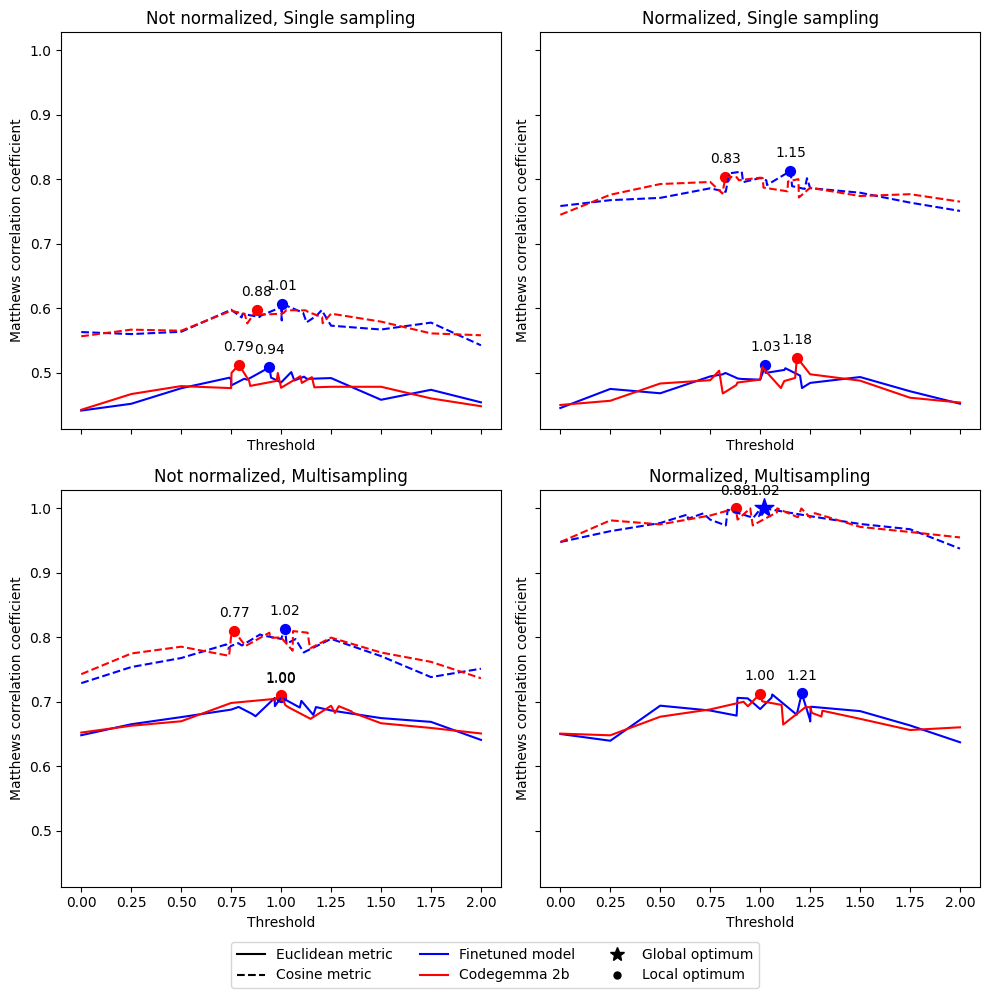

In [157]:
mids = ['checkpoints/finetuned_0', 'google/codegemma-2b']
distance_functions = ['cosine', 'euclidean']
normalize_values = [False, True]
sample_many_values = [False, True]

fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharey=True, sharex=True)
colors = [plt.get_cmap('bwr')(i) for i in (0, 1 - 1e-6)]
line_styles = ['-', '--']

for y, normalize in enumerate(normalize_values):
    for x, sample_many in enumerate(sample_many_values):
        ax = axs[x, y]
        for (color, line_style), (mid, distance_function) in zip(itertools.product(colors, line_styles), itertools.product(mids, distance_functions)):
            df = combined_df[
                (combined_df['mid'] == mid) &
                (combined_df['distance_function'] == distance_function) &
                (combined_df['normalize'] == normalize) &
                (combined_df['sample_many'] == sample_many)
            ]
            X = df['test_threshold']
            Y = df['mcc']
            XY = list(zip(X, Y))
            XY.sort(key=lambda x: x[0])
            X, Y = zip(*XY)

            XY_best = max(XY, key=lambda x: x[1])
            X_best, Y_best = XY_best

            title = ""
            title += "Normalized, " if normalize else "Not normalized, "
            title += "Multisampling" if sample_many else "Single sampling"
            ax.set_title(title)
            
            ax.plot(X, Y, c=color, linestyle=line_style, label=f'Model: {mid}; Distance metric: {distance_function}')

            marker = mpl.markers.MarkerStyle(
                marker='*' if X_best == X_opt and Y_best == Y_opt else '.',
                fillstyle='full'# if distance_function == 'cosine' else 'none'
            )
            label = 'Global optimum' if X_best == X_opt and Y_best == Y_opt else 'Local optimum*'
            ax.scatter(X_best, Y_best, c=color, marker=marker, s=200, label=label)
            ax.annotate(f'{X_best:.2f}', (X_best, Y_best), textcoords="offset points", xytext=(0, 10), ha='center')

            ax.set_xlabel('Threshold')
            ax.set_ylabel('Matthews correlation coefficient')

legend_elements = [
    mpl.lines.Line2D([0], [0], color='black', linestyle='-', label='Euclidean metric'),
    mpl.lines.Line2D([0], [0], color='black', linestyle='--', label='Cosine metric'),
    mpl.lines.Line2D([0], [0], color=colors[0], label='Finetuned model'),
    mpl.lines.Line2D([0], [0], color=colors[1], label='Codegemma 2b'),
    mpl.lines.Line2D([0], [0], marker='*', color='k', label='Global optimum', markersize=10, linestyle='None'),
    mpl.lines.Line2D([0], [0], marker='.', color='k', label='Local optimum', markersize=10, linestyle='None')
]
fig.legend(handles=legend_elements, loc='lower center', ncol=3, bbox_to_anchor=(0.5, 0))
fig.tight_layout(rect=[0, 0.05, 1, 1])

            

